In [8]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# making the df
amaz = pd.read_csv(r'C:\Users\User\Desktop\Bussiness\Programacao\Estudos\Ironhack\mz_uk_price_prediction_dataset.csv')
amaz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
amaz.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

Category


In [5]:
# frequency tables
display(amaz['category'].value_counts(normalize=True)*100)

table = pd.crosstab(index=amaz['category'], columns= 'count').reset_index()
table.sort_values('count', inplace=True, ascending=False)
table

Sports & Outdoors                         34.221949
Beauty                                     0.790293
Handmade Clothing, Shoes & Accessories     0.786896
Bath & Body                                0.781290
Birthday Gifts                             0.776625
                                            ...    
Alexa Built-In Devices                     0.004379
Motorbike Chassis                          0.004379
Plugs                                      0.004379
Smart Home Security & Lighting             0.004256
Smart Speakers                             0.002210
Name: category, Length: 296, dtype: float64

col_0,category,count
262,Sports & Outdoors,836265
20,Beauty,19312
116,"Handmade Clothing, Shoes & Accessories",19229
16,Bath & Body,19092
29,Birthday Gifts,18978
...,...,...
226,Plugs,107
195,Motorbike Chassis,107
6,Alexa Built-In Devices,107
254,Smart Home Security & Lighting,104


In [6]:
table['category'].value_counts().mean()

1.0

In [7]:
# top 5 category
top = table[0:5]
top

col_0,category,count
262,Sports & Outdoors,836265
20,Beauty,19312
116,"Handmade Clothing, Shoes & Accessories",19229
16,Bath & Body,19092
29,Birthday Gifts,18978


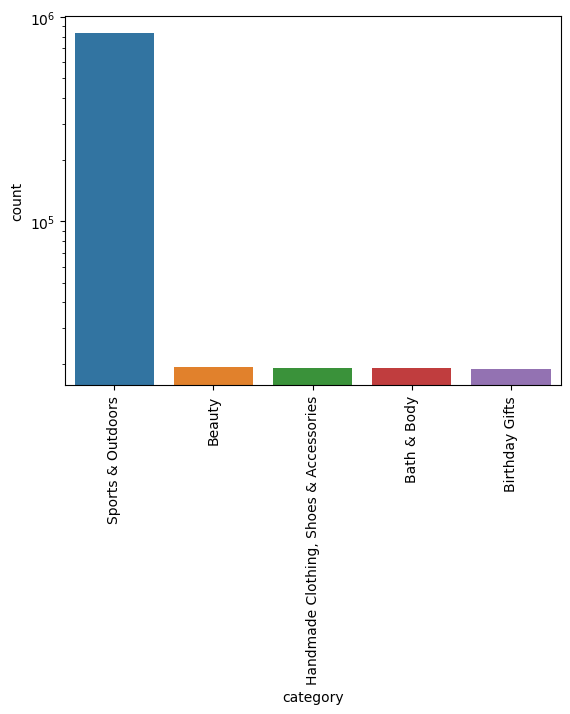

In [62]:
sns.barplot(x= top['category'], y= top['count']).set_yscale('log')
plt.xticks(rotation= 'vertical')
plt.show()

<Axes: ylabel='count'>

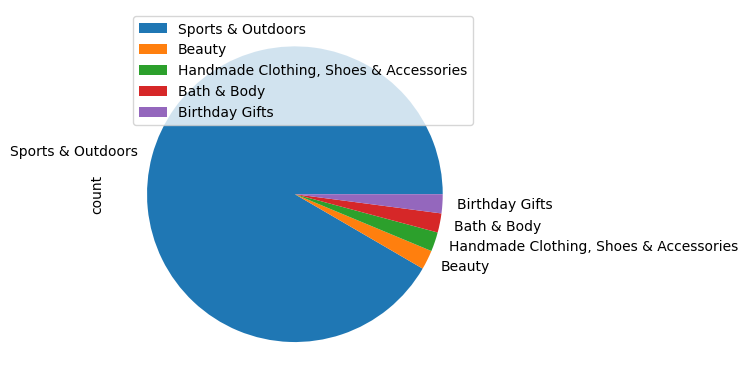

In [9]:
top.plot.pie(y='count', labels= top['category'], normalize=True)

Price

In [10]:
# measures of centrality
print(f"""The price mean: {round(amaz.price.mean(),2)}, the price median: {amaz.price.median()}, the price mode: {amaz.price.mode()[0]} \n
The difference between the avarage price point to the mode price point is {round(amaz.price.mean(),2)-amaz.price.mode()[0]} 
pounds.
""")

The price mean: 89.24, the price median: 19.09, the price mode: 9.99 

The difference between the avarage price point to the mode price point is 79.25 
pounds.



In [11]:
# measures of dispersion
print(f"""The price variation: {round(amaz.price.std()**2,2)}, 
the price standard deviation: {round(amaz.price.std(),2)}, the price quartile range: {amaz.price.describe()[6] - amaz.price.describe()[4]} \n
The range of the spread of prices is {amaz.price.max()-amaz.price.min()} pounds.
""")


The price variation: 119445.49, 
the price standard deviation: 345.61, the price quartile range: 36.0 

The range of the spread of prices is 100000.0 pounds.



(-50.0, 750.0)

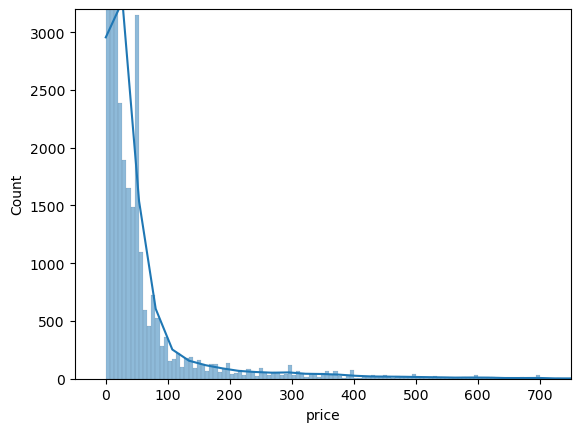

In [25]:
# visualizations
sns.histplot(amaz.head(40000), x='price', bins= 800, kde=True)
plt.ylim(0,3200)
plt.xlim(-50,750)

# I got to limit the amount of data and get a sample cause it was too big for my
# pc process it effectivelly, and some cuts on the vizualization due to outliers

(-50.0, 650.0)

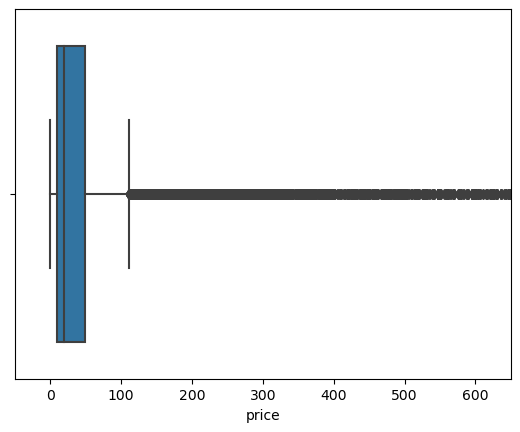

In [29]:
sns.boxplot(amaz.head(40000), x= 'price')
plt.xlim(-50,650)

# As seen the Qr didn't even reach the 100s, and outliers keep going on.

Ratings

In [33]:
# measures of centrality
print(f"""The rating mean: {round(amaz.stars.mean(),2)}, the rating median: {amaz.stars.median()}, the rating mode: {amaz.stars.mode()[0]} \n
The difference between the avarage rating point to the mode rating point is {round(amaz.stars.mean(),2)-amaz.stars.mode()[0]} stars. \n
That means that usually the costumer doesn't rate or leave a rate zero (bad) in the review
""")

The rating mean: 2.15, the rating median: 0.0, the rating mode: 0.0 

The difference between the avarage rating point to the mode rating point is 2.15 stars. 

That means that usually the costumer doesn't rate or leave a rate zero (bad) in the review



In [34]:
# measures of dispersion
print(f"""The rating variation: {round(amaz.stars.std()**2,2)}, 
the rating standard deviation: {round(amaz.stars.std(),2)}, the rating quartile range: {amaz.stars.describe()[6] - amaz.stars.describe()[4]} \n
The range of the spread of ratings is {amaz.stars.max()-amaz.stars.min()} stars.
There is a enormous amout of variation on the feedback(inconsistent).
""")

The rating variation: 4.82, 
the rating standard deviation: 2.19, the rating quartile range: 4.4 

The range of the spread of ratings is 5.0 stars.
There is a enormous amout of variation on the feedback(inconsistent).



In [43]:
print(f""" 
      the skewness is {amaz.stars.skew()}.
      And the kurtosis is {amaz.stars.kurtosis()}.
      The ratings are really skewed positivelly with the mode being in zero,
      the distribution is not normal, and there is a one sided fat tail.
      """)


 
      the skewness is 0.08120735761080985.
      And the kurtosis is -1.9260061280432985.
      The ratings are really skewed positivelly with the mode being in zero,
      the distribution is not normal, and there is a one sided fat tail.
      


(0.0, 1600.0)

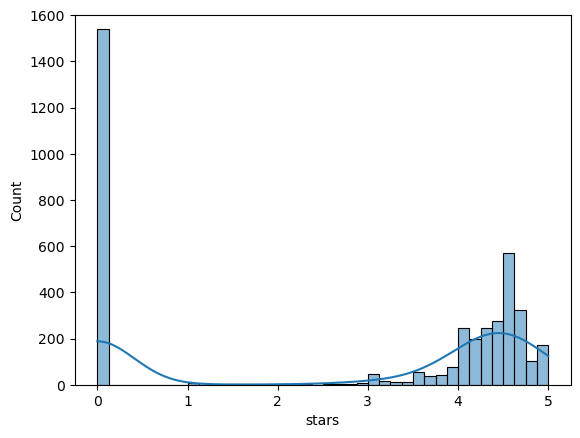

In [41]:
# vizualization
sns.histplot(amaz.head(4000), x= 'stars', bins=40, kde=True)
plt.ylim(0,1600)

# 0 by far is the most common rating